In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [4]:
crime[['INCIDENTNEIGHBORHOOD', 'OFFENSES']]

,INCIDENTNEIGHBORHOOD,OFFENSES
0,Bloomfield,3929 Retail Theft.
1,Outside City,13(a)(16) Possession of Controlled Substance
2,Westwood,3929 Retail Theft.
3,East Allegheny,5503 Disorderly Conduct. / 5505 Public Drunken...
4,Crafton Heights,2702 Aggravated Assault. / 2705 Recklessy Enda...
...,...,...
54513,South Side Flats,3802(a)(1) DUI - General Impairment
54514,Squirrel Hill South,1501(A) Valid Driver's License Required / 3802...
54515,Squirrel Hill South,13(a)(16) Possession of Controlled Substance /...
54516,South Side Flats,2701 Simple Assault. / 5505 Public Drunkenness...


In [5]:
#sorted = crime.groupby('INCIDENTNEIGHBORHOOD').agg(TotalOffenses = ('OFFENSES', 'sum')).sort_values(by='TotalOffenses')
print("Below is a list of total arrests by neighborhood in Pittsburgh.")
sorted = crime['INCIDENTNEIGHBORHOOD'].value_counts()
print(sorted)

Below is a list of total arrests by neighborhood in Pittsburgh.
Central Business District    3314
South Side Flats             2843
Carrick                      1960
East Allegheny               1772
Homewood South               1743
                             ... 
Regent Square                  28
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


### Reported crime can be a very useful metric when considering the livability of an area. Here we can see the total number of arrests in each neighborhood of Pittsburgh.
### It is important to note that total numbers can be misleading in statistics. It is safe to assume that our city's population is NOT evenly distributed across every neighborhood. Thus, one could successfully argue that arrests per capita is a more meaningful metric.
### We should also consider that an individual arrested in a particular neighborhood does not indicate that they are a resident of that neighborhood.
### However, for the sake of ease, we WILL consider total arrests as indicative of the relative safety of an area. It is also worth noting that not all criminal activity leads to an arrest, and not all arrests lead to criminal convictions in court.

Text(0.5, 0, 'Total Arrests')

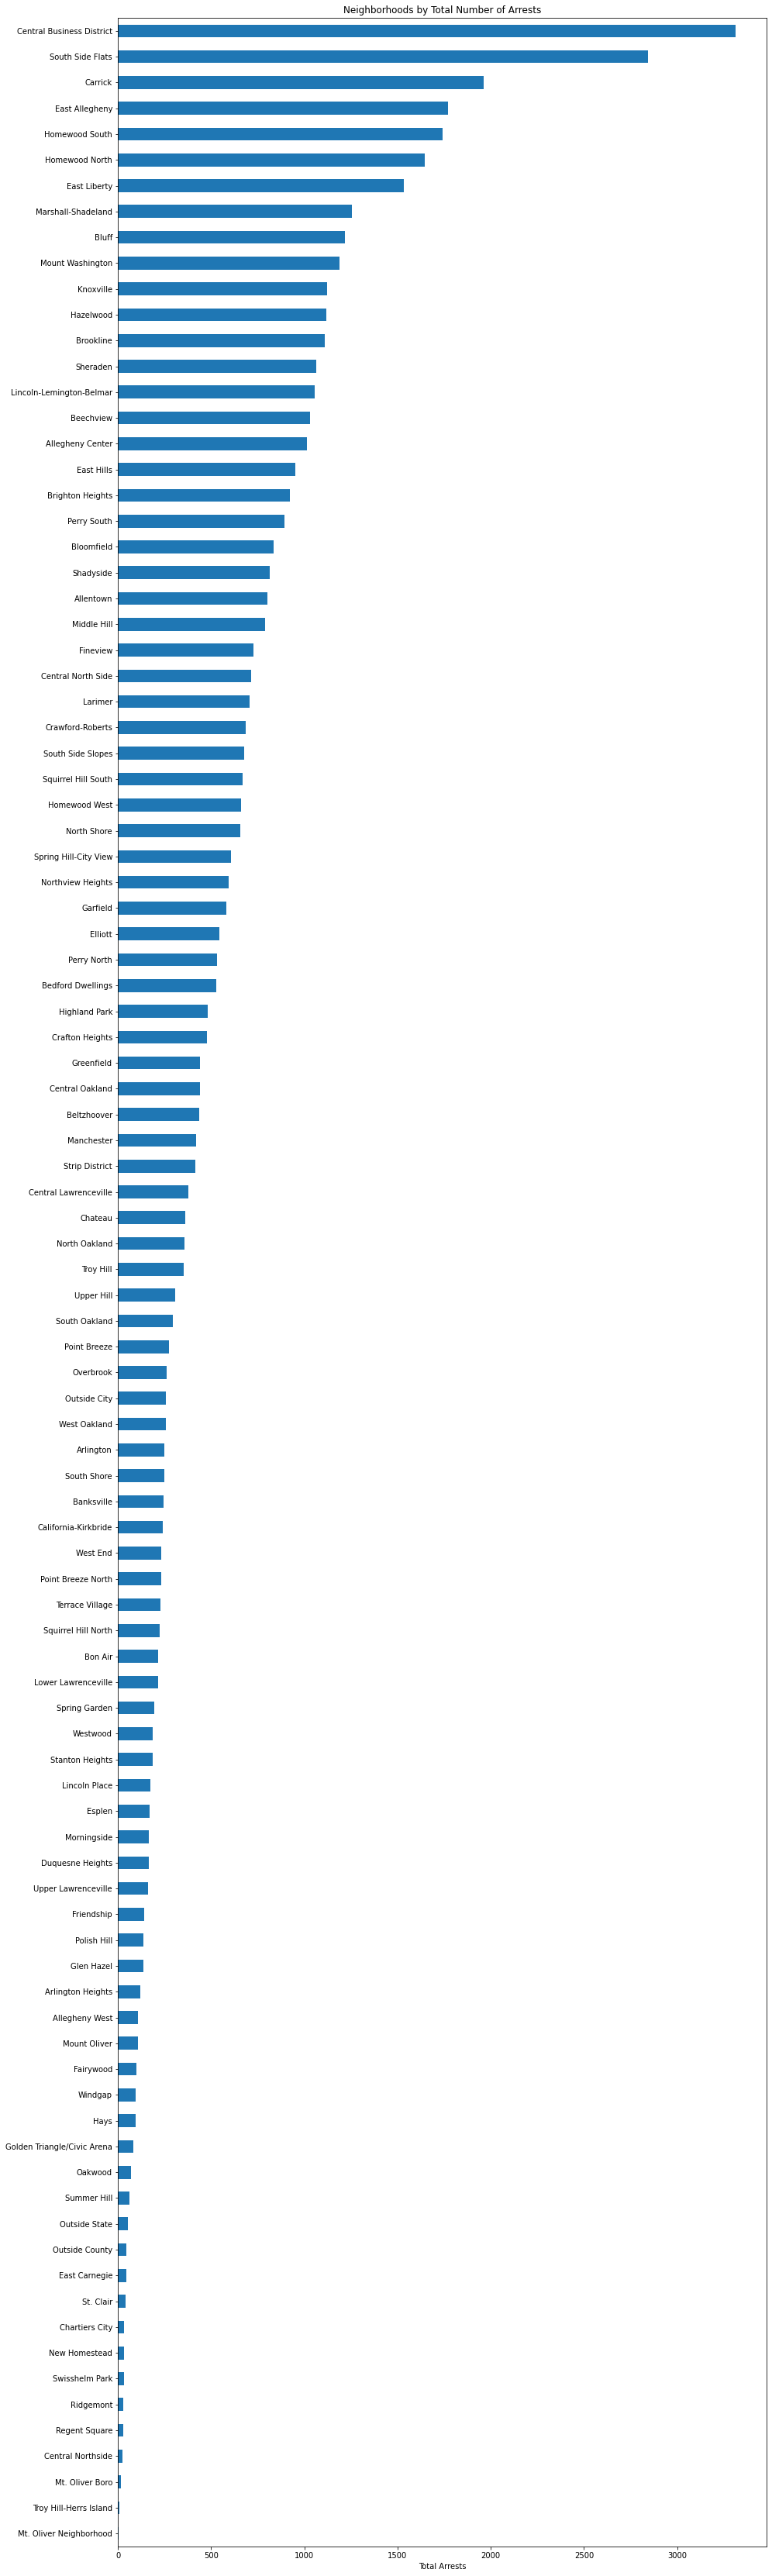

In [7]:
sorted.sort_values().plot(kind='barh', figsize=(15,60))
plt.title("Neighborhoods by Total Number of Arrests")
plt.xlabel("Total Arrests")